<a href="https://colab.research.google.com/github/saikumaranumala/letsupgrade/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP : The Spark Foundation

#Data Science and Business Analytics Intern






**TASK - 1 : PREDICTION USING SUPERVISED MACHINE LEARNING**


**NAME: SAI KUMAR ANUMALA**

**In this task we need to predict the percentage scorevof a student based on the number of hours studied. The task has two variables where the one is no.of hours studied and the other target value i.e, percentage score. This can be sovled using simple linear regression.**

In [79]:
#Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pt
%matplotlib  inline 

# ***Reading data from remote url***

In [80]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print('data imported sucessfully')

data imported sucessfully


# ***Exploring Data***

In [81]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [82]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Now we can  plot our data points on 2-D graph to checking insight of our dataset and check if we can manually find any relationship between the data. We can create the plot with the following script:**

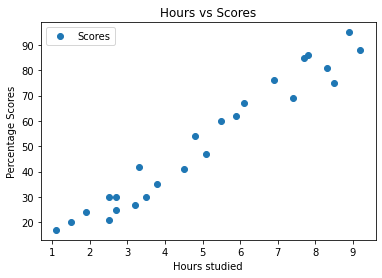

In [83]:
#plotting the distribution of scores
data.plot(style='o',x='Hours',y='Scores');
pt.title('Hours vs Scores')
pt.xlabel('Hours studied')
pt.ylabel('Percentage Scores')
pt.show()

**Now we can find a correlation .The correlation which gives to identifies the cofficent degrees that points ,having relation or not. In which pearson's method helps to measuring the strength of the assosiation between two continious variables .**

In [84]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**As per above result , if the number of hours increased then Scores will be increased . And also conclude there is a positive linear relation between the Hours and Scores.**   

# ***Linear Regression***

In [85]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state = 0)

**Training the Alogorithm**

*Here we splitted our data into training and testing sets, in which we need to train the train sets using the fit function importing the LinearRegresssion method*

In [86]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
print('The training sets trained')


The training sets trained


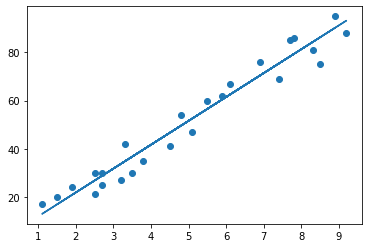

In [87]:
#plotting the regression line
m=reg.coef_
c = reg.intercept_
line = m*X+c
pt.scatter(X,y)
pt.plot(X,line);
pt.show()

****After seeing the scatter plot of the data they cannot be any line in which all the points falls.In which Sklearn does , finds the lines actual vs pdetict points is minimum.
Basically, The sum of the diff. of pred.values and actual values of Scores has to be minimum.****

# Making Predictions

In [49]:
#Testing data - in Hours
print(X_test) 
#Predicting the scores
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [52]:
#Comparing Actual  VS Predict values
df = pd.DataFrame({'Actual ': y_test,'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [74]:
#We can test with our own data
hours = 9.25
own_pred = reg.predict([[hours]])
print('No.Hours ={}'.format(hrs))
print('Predicted score ={}'.format(own_pred[0]))

No.Hours =9.25
Predicted score =93.69173248737539


In [75]:
print('if the student studies {} hours per day he/she will scores {} % in exam.'.format(hours,own_pred))

if the student studies 9.25 hours per day he/she will scores [93.69173249] % in exam.


# Model Evaluation

*Now we are in final stage to calculating the perfomance of algorithm.from this evaluating the algorithms on a particular dataset.And also finding the Score of the regression Function.*


**Through the metrics ,I've choosen the mean square error and 
imported the  R2_score for regression score**

In [78]:
from sklearn import metrics
from sklearn.metrics import r2_score #optional 
print('Mean Absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Regression score ',r2_score(y_test,y_pred))

Mean Absolute error: 4.183859899002982
Regression score  0.9454906892105354
